In [ ]:
!pip install torch torchvision torchaudio

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("Dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Input   15 non-null     int64
 1   Output  15 non-null     int64
dtypes: int64(2)
memory usage: 372.0 bytes


In [21]:
X=df['Input']
y=df['Output']
y = y.values.reshape(-1, 1)   
X = X.values.reshape(-1, 1)   


In [22]:
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]]
[[ 100]
 [ 200]
 [ 300]
 [ 400]
 [ 500]
 [ 600]
 [ 700]
 [ 800]
 [ 900]
 [1000]
 [1100]
 [1200]
 [1300]
 [1400]
 [1500]]


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [36]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [37]:
import torch.nn as nn
class NeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(1,8)
    self.fc2=nn.Linear(8,10)
    self.fc3=nn.Linear(10,1)
    self.relu=nn.ReLU()
    self.history={'loss':[]}

  def forward(self,x):
    x=self.relu(self.fc1(x))
    x=self.relu(self.fc2(x))
    x=self.fc3(x)
    return x

In [38]:
leo = NeuralNet()
criterion=nn.MSELoss()
optimizer=torch.optim.RMSprop(leo.parameters(),lr=0.001)

In [39]:
def train_model(leo,X_train,y_train,criterion,optimizer,epochs=2000):
  for epoch in range(epochs):
    optimizer.zero_grad()
    loss = criterion(leo(X_train),y_train)
    loss.backward()
    optimizer.step()

    leo.history['loss'].append(loss.item())
    if epoch % 200 == 0:
      print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}")


In [40]:
train_model(leo,X_train_tensor,Y_train_tensor,criterion,optimizer)

Epoch [0/2000], Loss: 693224.687500
Epoch [200/2000], Loss: 690196.125000
Epoch [400/2000], Loss: 683398.250000
Epoch [600/2000], Loss: 672243.625000
Epoch [800/2000], Loss: 656079.250000
Epoch [1000/2000], Loss: 634380.750000
Epoch [1200/2000], Loss: 606780.500000
Epoch [1400/2000], Loss: 573100.375000
Epoch [1600/2000], Loss: 533387.875000
Epoch [1800/2000], Loss: 487954.937500


In [42]:
with torch.no_grad():
  test_loss=criterion(leo(X_test_tensor),Y_test_tensor)
  print(f"Test loss: {test_loss.item():.6f}")

Test loss: 751418.125000


Text(0, 0.5, 'Loss')

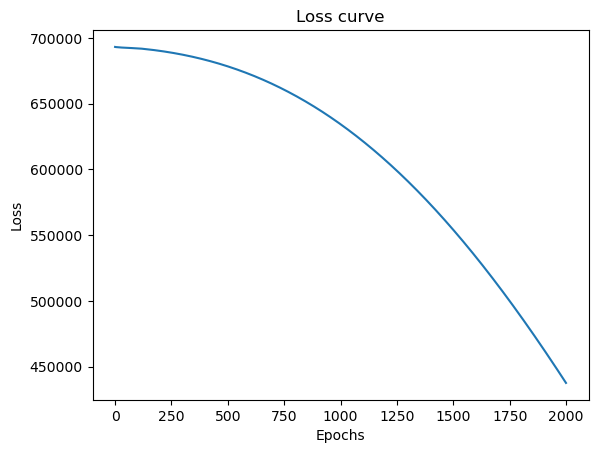

In [44]:
import matplotlib.pyplot as plt
plt.plot(leo.history['loss'])
plt.title("Loss curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")